In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

###  Trying for small subset

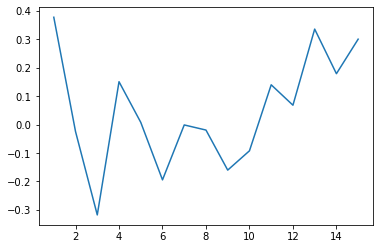

In [2]:
T =15
time = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.2, (T,))

plt.plot(time, x)
plt.grid = True
plt.show()

In [3]:
time

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15.])

In [4]:
torch.normal(0, 0.2, (T,)).shape

torch.Size([15])

In [5]:
torch.sin(0.01 * time).shape

torch.Size([15])

In [6]:
x

tensor([ 0.3770, -0.0247, -0.3175,  0.1505,  0.0077, -0.1944, -0.0014, -0.0194,
        -0.1601, -0.0923,  0.1397,  0.0679,  0.3353,  0.1786,  0.2999])

In [7]:
tau = 4
features = torch.zeros((T-tau, tau))

In [8]:
features.shape, features

(torch.Size([11, 4]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [9]:
for i in range(tau):
    features[:, i] = x[i:T- tau+ i]
    print("iteration :", i, " :\n", features)
    
    # its a strange way to build up the features


iteration : 0  :
 tensor([[ 0.3770,  0.0000,  0.0000,  0.0000],
        [-0.0247,  0.0000,  0.0000,  0.0000],
        [-0.3175,  0.0000,  0.0000,  0.0000],
        [ 0.1505,  0.0000,  0.0000,  0.0000],
        [ 0.0077,  0.0000,  0.0000,  0.0000],
        [-0.1944,  0.0000,  0.0000,  0.0000],
        [-0.0014,  0.0000,  0.0000,  0.0000],
        [-0.0194,  0.0000,  0.0000,  0.0000],
        [-0.1601,  0.0000,  0.0000,  0.0000],
        [-0.0923,  0.0000,  0.0000,  0.0000],
        [ 0.1397,  0.0000,  0.0000,  0.0000]])
iteration : 1  :
 tensor([[ 0.3770, -0.0247,  0.0000,  0.0000],
        [-0.0247, -0.3175,  0.0000,  0.0000],
        [-0.3175,  0.1505,  0.0000,  0.0000],
        [ 0.1505,  0.0077,  0.0000,  0.0000],
        [ 0.0077, -0.1944,  0.0000,  0.0000],
        [-0.1944, -0.0014,  0.0000,  0.0000],
        [-0.0014, -0.0194,  0.0000,  0.0000],
        [-0.0194, -0.1601,  0.0000,  0.0000],
        [-0.1601, -0.0923,  0.0000,  0.0000],
        [-0.0923,  0.1397,  0.0000,  0.0000

In [10]:
labels = x[tau:].reshape((-1,1))

In [11]:
labels

tensor([[ 0.0077],
        [-0.1944],
        [-0.0014],
        [-0.0194],
        [-0.1601],
        [-0.0923],
        [ 0.1397],
        [ 0.0679],
        [ 0.3353],
        [ 0.1786],
        [ 0.2999]])

In [12]:
torch.zeros((T-tau, tau)).shape

torch.Size([11, 4])

In [13]:
x[1:T-4+1].shape

torch.Size([11])

### Okay,
so what we are essentially doing is in a series we are trying to select a particular numbe rof values (tau) and then the next number is put as the label

### Training more data
for real

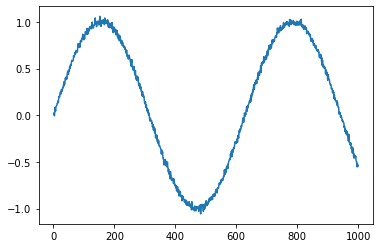

In [14]:
# generating data
T = 1000
t = torch.arange(1, T+1, dtype=torch.float32)
x = torch.sin(0.01 * t) + torch.normal(0,0.02, (T,))
plt.plot(t,x)
plt.show()

In [15]:
#x.sum()
#x

In [16]:
# making features and labels
tau=4
features = torch.zeros(T-tau, tau)

In [17]:
labels = torch.zeros(len(x)-tau)
labels.shape
    

torch.Size([996])

### Lets try a different way of generating features and labels

In [18]:
for i in range(len(x)-tau):
    features[i,:] = x[i:i+tau]
    labels[i] = x[i+tau]

In [19]:
features.shape, labels.shape

(torch.Size([996, 4]), torch.Size([996]))

In [20]:
features[0:5], labels[0:5]

(tensor([[ 0.0106,  0.0265, -0.0066,  0.0233],
         [ 0.0265, -0.0066,  0.0233,  0.0824],
         [-0.0066,  0.0233,  0.0824,  0.0657],
         [ 0.0233,  0.0824,  0.0657,  0.0450],
         [ 0.0824,  0.0657,  0.0450,  0.0874]]),
 tensor([0.0824, 0.0657, 0.0450, 0.0874, 0.0963]))

In [21]:
labels = labels.reshape(-1,1)
labels[:5,:]

tensor([[0.0824],
        [0.0657],
        [0.0450],
        [0.0874],
        [0.0963]])

In [22]:
batch_size = 16
n_train = 600

train_dataset = torch.utils.data.TensorDataset(*(features[:n_train], labels[:n_train]))
train_iter = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

test_dataset = torch.utils.data.TensorDataset(*(features[n_train:], labels[n_train:]))
test_iter = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

In [23]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [24]:
def get_net():
    net = nn.Sequential(nn.Linear(4,10), nn.ReLU(), nn.Linear(10,1))
    net.apply(init_weights)
    return net

In [25]:
loss = nn.MSELoss()

In [26]:
def evaluate_loss(net, test_iter, loss):
    net.eval()
#     net = net.to(torch.device("cpu"))
    with torch.no_grad():
        l = 0
        numer = 0
        for X, y in test_iter:
            l += loss(net(X),y)
            numer += y.shape[0]
        return l/numer

In [27]:
def train(net, train_iter,test_iter, loss, epochs, lr):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     net = net.to(device)
    net.train()
    for epoch in range(epochs):
        for X, y in train_iter:
    #         X = X.to(device)
    #         y = y.to(device)
            y_hat = net(X)
            #print(y_hat.shape)
            optimizer.zero_grad()
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
        print(f"for epoch {epoch} : test loss: {evaluate_loss(net,train_iter,loss)} " )
        

In [28]:
net = get_net()
train(net, train_iter,test_iter, loss, 10, 0.01)

for epoch 0 : test loss: 0.0011373287998139858 
for epoch 1 : test loss: 0.0006775535293854773 
for epoch 2 : test loss: 0.0003749264869838953 
for epoch 3 : test loss: 0.000279771484201774 
for epoch 4 : test loss: 0.00022748031187802553 
for epoch 5 : test loss: 0.00019417486328165978 
for epoch 6 : test loss: 0.00015813032223377377 
for epoch 7 : test loss: 0.0001301721640629694 
for epoch 8 : test loss: 0.00010627062147250399 
for epoch 9 : test loss: 0.00010317951091565192 


In [29]:
# lets try predicting

pred_x = []
for X, y in test_iter:
    pred_x.append(net(X))

len(pred_x)

25

In [30]:
pred_x = net(features)

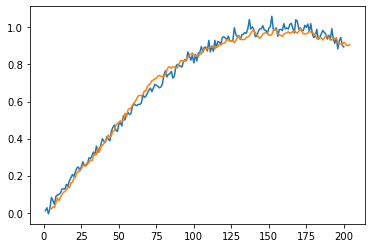

In [32]:
plt.plot(t[:200], x[:200])
plt.plot(t[tau:200+tau], pred_x[:200].detach().numpy())
plt.show()

### multistep prediction
Generally, for an observed sequence up to xt
, its predicted output xˆt+k at time step t + k is called
the k-step-ahead prediction. Since we have observed up to x604, its k-step-ahead prediction is xˆ604+k.

In [35]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train+tau] = x[:n_train+tau]

In [39]:
multistep_preds[n_train+tau:].shape # this will be all zeros

torch.Size([396])

In [41]:
multistep_preds[0:4].reshape((-1,1)).shape

torch.Size([4, 1])

In [43]:
for i in range(n_train+tau, T):
    multistep_preds[i] = net(multistep_preds[i-tau:i].reshape((-1,1)).squeeze(1))

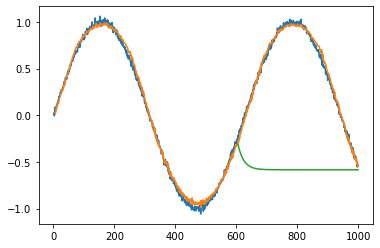

In [45]:
plt.plot(t, x)
plt.plot(t[tau:], pred_x.detach().numpy())
plt.plot(t[n_train+tau:], multistep_preds[n_train+tau:].detach().numpy())